Objective:

The primary objective of this research is to use Exploratory Data Analysis (EDA) on the OYO hotel dataset in order to find lucrative investment opportunities and uncover the salient characteristics that affect hotel income and guest happiness. This analysis seeks to help data-driven decision-making for strategic expansion and operational optimisation within the OYO hotel network by identifying trends and insights within the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline


In [ ]:
#Mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading CSV file
file_path='/content/drive/MyDrive/oyo hotel investment insights/OYO_HOTEL_ROOMS.csv'
df=pd.read_csv(file_path)

In [ ]:
#loading dataset
df.head()

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0.0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819,65%,104
1,1.0,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702,65%,410
2,2.0,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289,64%,879
3,3.0,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094,66%,75
4,4.0,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656,65%,686


In [ ]:
df.shape

(791, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  460 non-null    float64
 1   Hotel_name  791 non-null    object 
 2   Location    791 non-null    object 
 3   Price       791 non-null    int64  
 4   Discount    791 non-null    object 
 5   Rating      791 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 37.2+ KB


In [ ]:
df.describe()

,Unnamed: 0,Price,Rating
count,460.000000,791.000000,791.000000
mean,229.500000,1887.429836,624.225032
std,132.934821,1045.644528,954.375780
min,0.000000,449.000000,1.000000
25%,114.750000,1140.000000,62.000000
50%,229.500000,1599.000000,262.000000
75%,344.250000,2349.000000,832.500000
max,459.000000,6849.000000,7398.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,331
Hotel_name,0
Location,0
Price,0
Discount,0
Rating,0


In [ ]:
#remove duplicates if there is any
df.drop_duplicates(inplace=True)

In [ ]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [ ]:
#Analytical information about price
df['Price'].describe()

,Price
count,791.000000
mean,1887.429836
std,1045.644528
min,449.000000
25%,1140.000000
50%,1599.000000
75%,2349.000000
max,6849.000000


In [ ]:
#Finding property price with o values
df.Price[df.Price<=0].count()

0

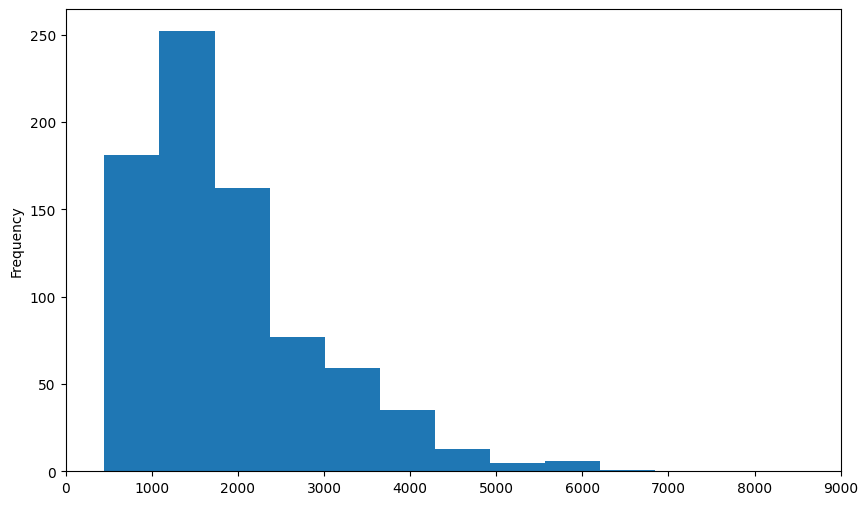

In [ ]:
#Price plotting
plt.figure(figsize=(10,6))
df['Price'].plot(kind='hist')
plt.xticks(np.arange(0, 10000, 1000))
plt.show()

In [ ]:
#Fetching the price greater than 1000
df.Price[df.Price>1000].count()

652

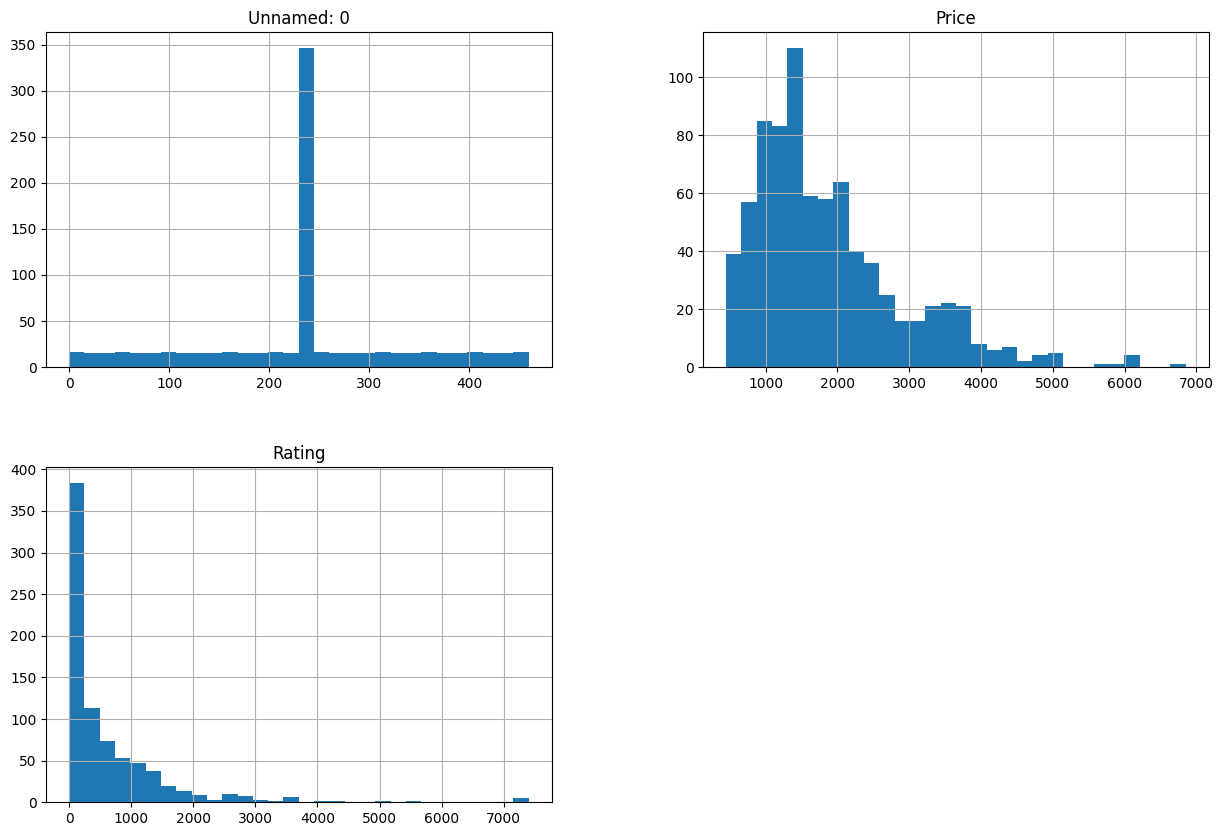

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.show()


<Axes: ylabel='Location'>

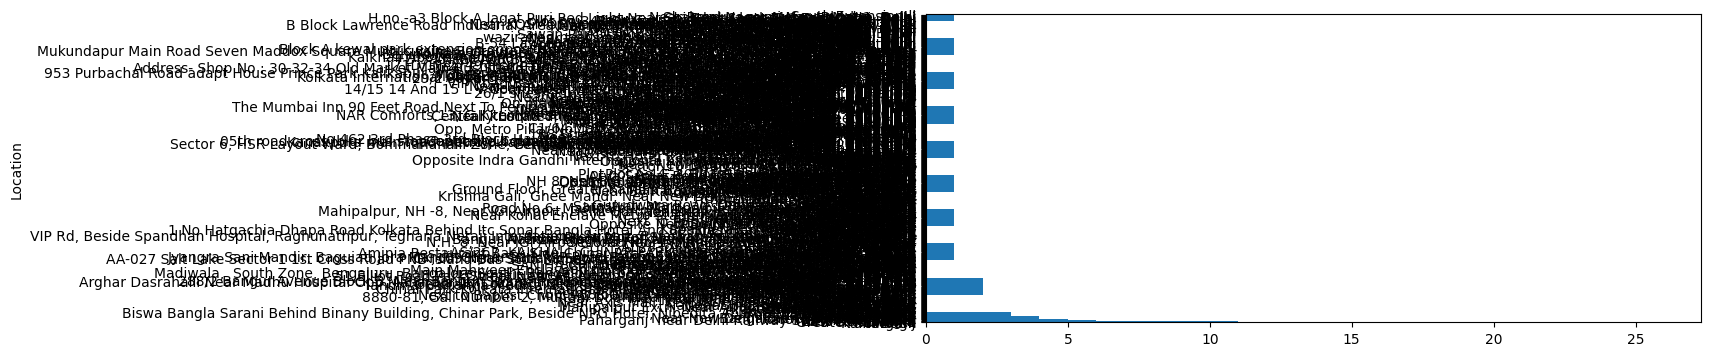

In [ ]:
df['Location'].value_counts().plot(kind='barh', figsize=(10, 4))

<ipython-input-37-93dff264f1fb>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


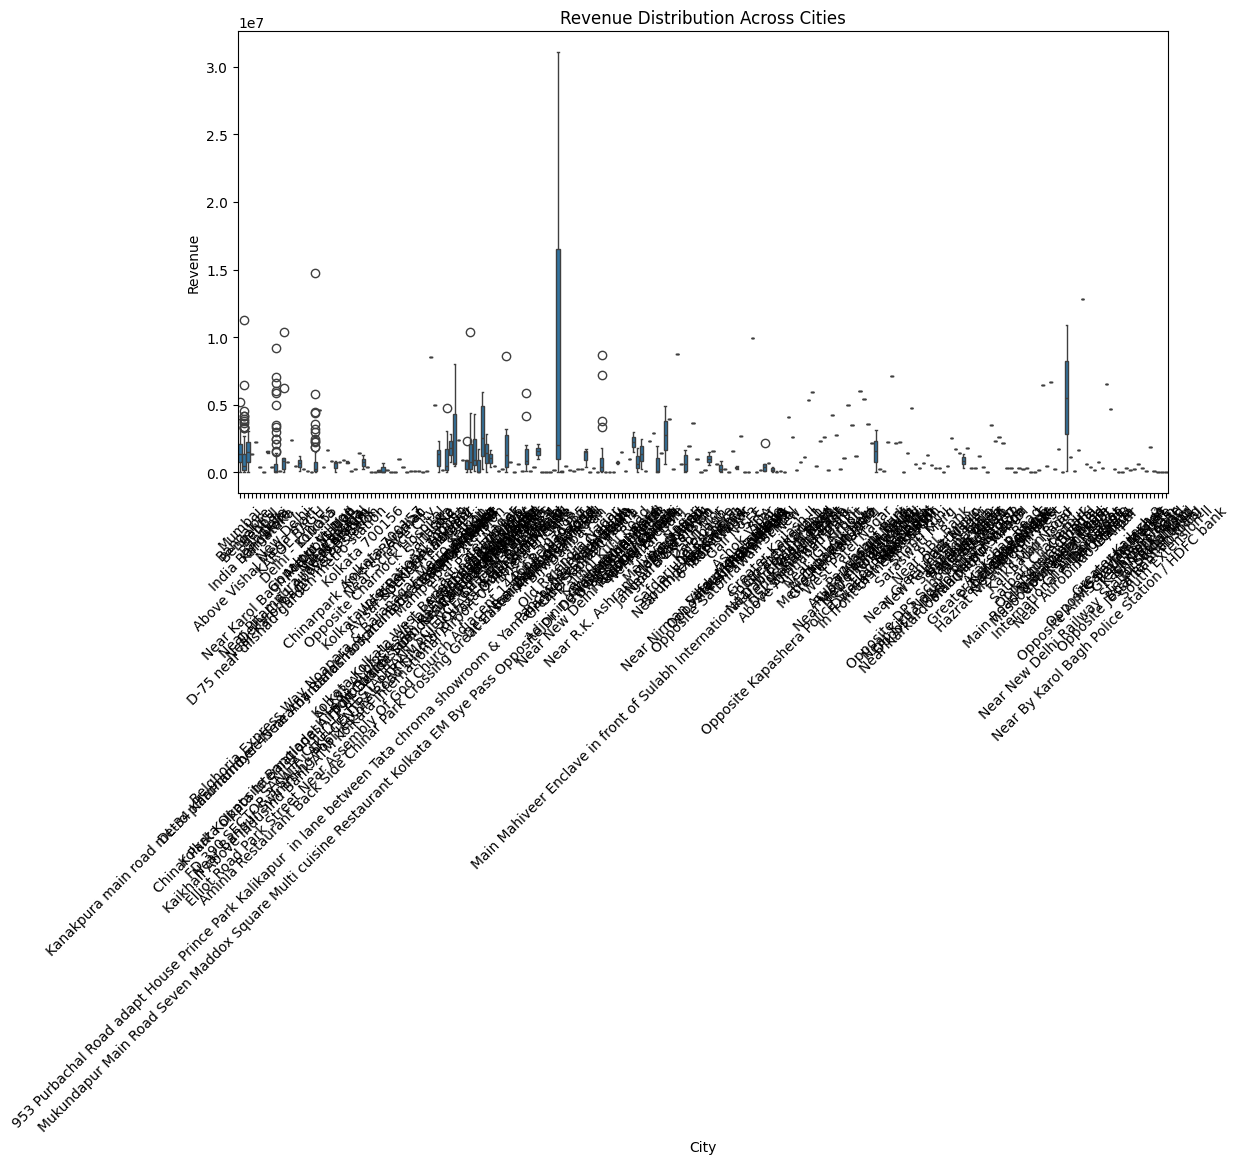

<ipython-input-37-93dff264f1fb>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


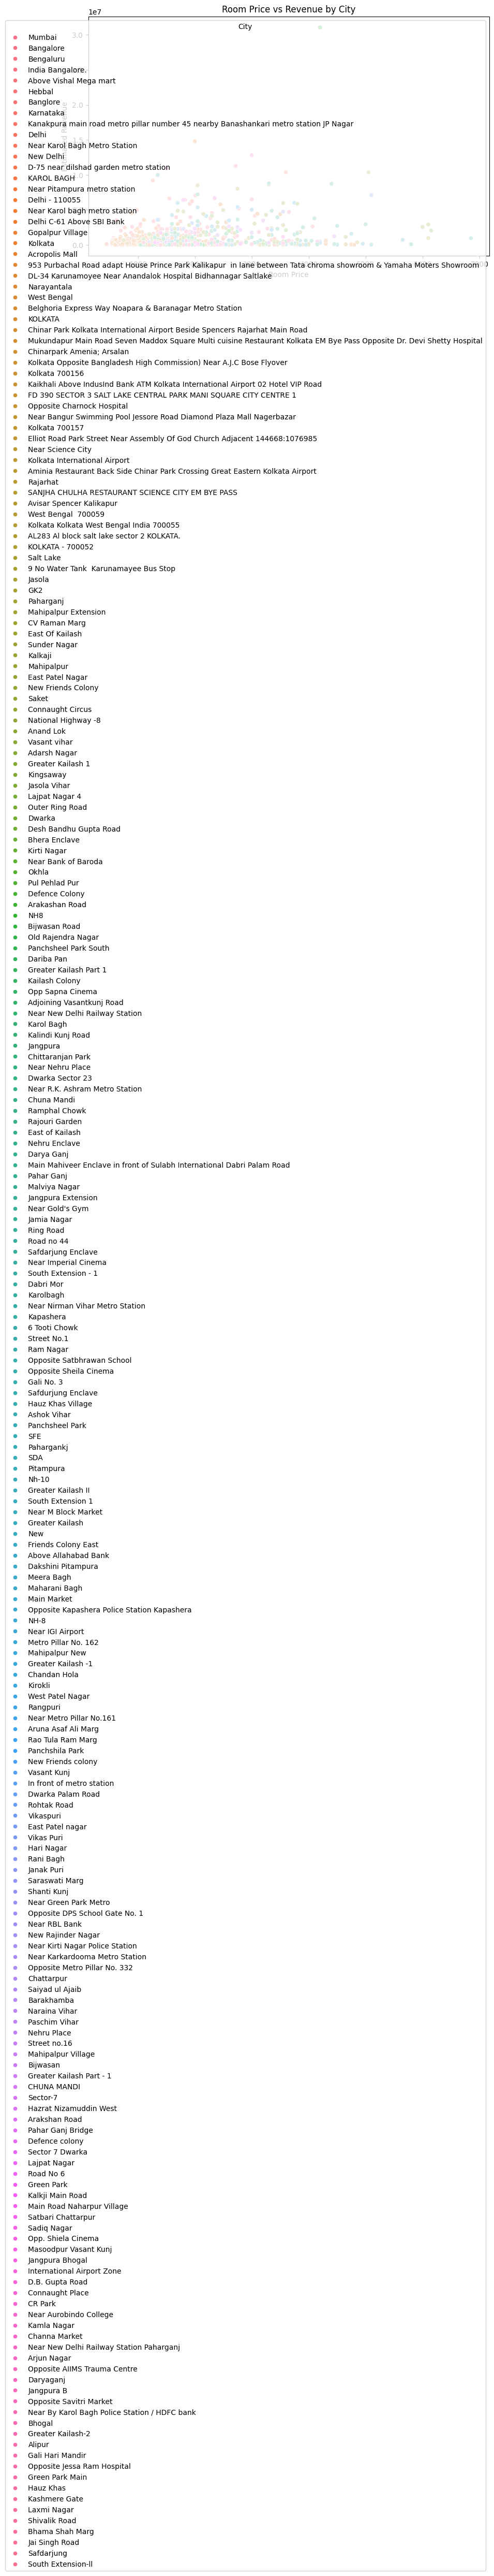

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Extract city from location (assuming last word in location string is city)
df['City'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip())

# Convert columns to numeric if needed
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculate estimated Revenue
df['Revenue'] = df['Price'] * df['Rating']

# Boxplot: Distribution of Revenue across Cities
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Revenue', data=df)
plt.title('Revenue Distribution Across Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatterplot: Room Rate vs Revenue with city as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Revenue', hue='City', data=df)
plt.title('Room Price vs Revenue by City')
plt.xlabel('Room Price')
plt.ylabel('Estimated Revenue')
plt.tight_layout()
plt.show()


<Axes: >

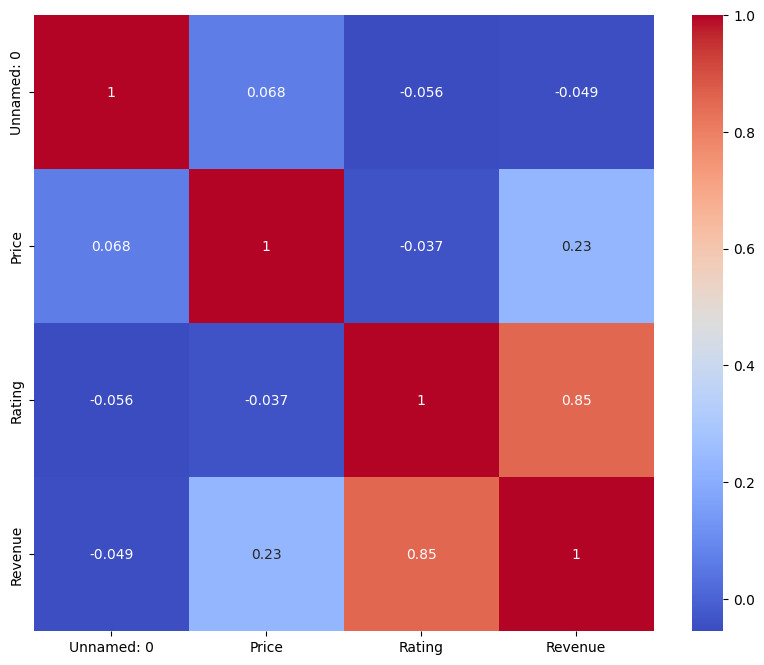

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


<Axes: title={'center': 'Avg Revenue by City'}, xlabel='City'>

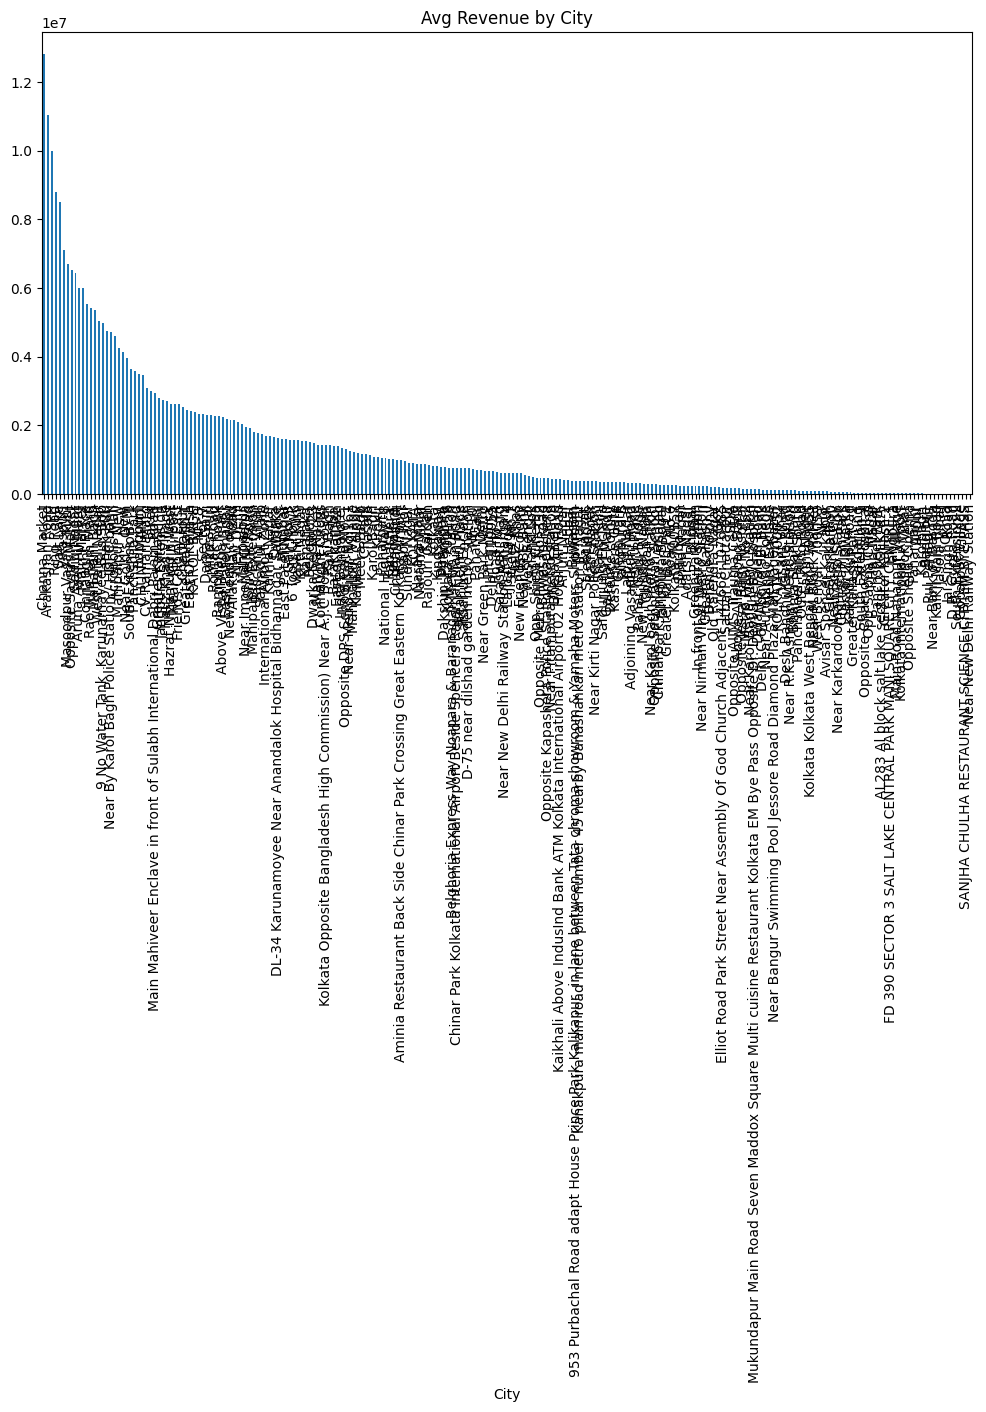

In [ ]:
city_revenue = df.groupby('City')['Revenue'].mean().sort_values(ascending=False)
city_revenue.plot(kind='bar', figsize=(12, 6), title='Avg Revenue by City')


<ipython-input-41-75469e7eb919>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


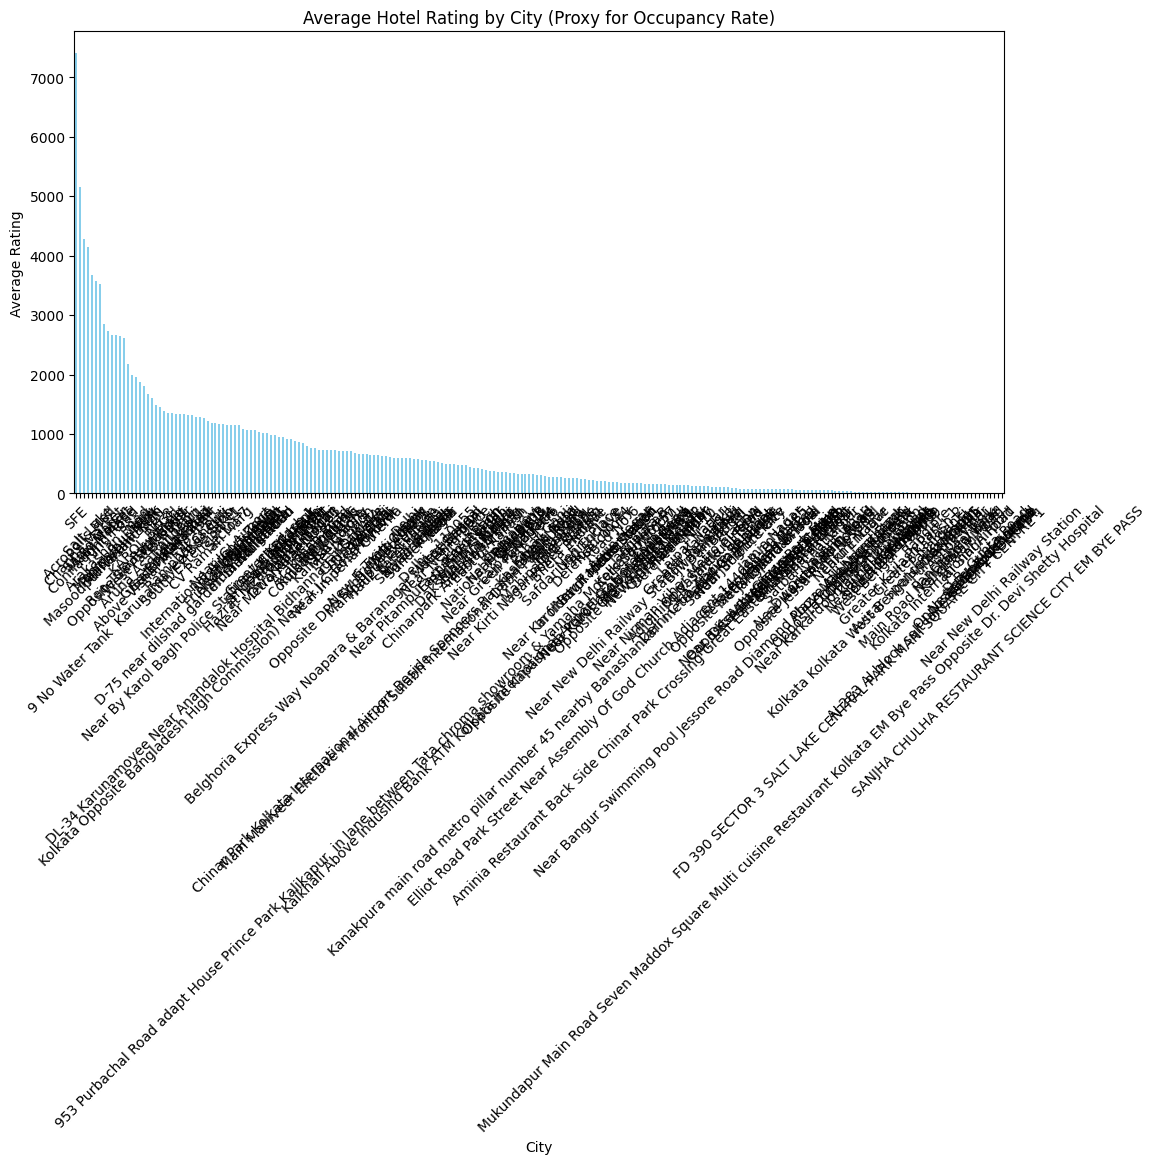

In [ ]:
import matplotlib.pyplot as plt

# First, clean and prepare data
df['City'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip())
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['City', 'Rating'])

# Group by city and calculate average rating as a proxy for occupancy
city_occupancy = df_clean.groupby('City')['Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
city_occupancy.plot(kind='bar', color='skyblue')
plt.title('Average Hotel Rating by City (Proxy for Occupancy Rate)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


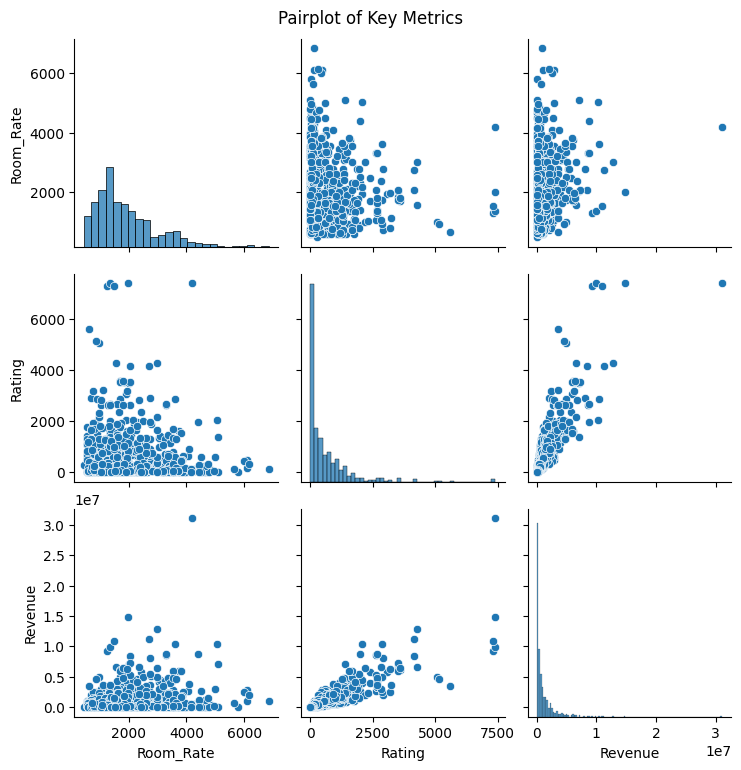

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create required columns
df['City'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Revenue'] = df['Price'] * df['Rating']

# Drop rows with missing values
df_clean = df.dropna(subset=['Price', 'Rating', 'Revenue'])

# Select important columns (using 'Price' instead of 'Room_Rate')
important_cols = ['Price', 'Rating', 'Revenue']

# Optional: Rename 'Price' to 'Room_Rate' for consistency in plots
df_clean = df_clean.rename(columns={'Price': 'Room_Rate'})

# Re-select with updated names
important_cols = ['Room_Rate', 'Rating', 'Revenue']

# Plot pairplot
sns.pairplot(df_clean[important_cols])
plt.suptitle('Pairplot of Key Metrics', y=1.02)
plt.show()


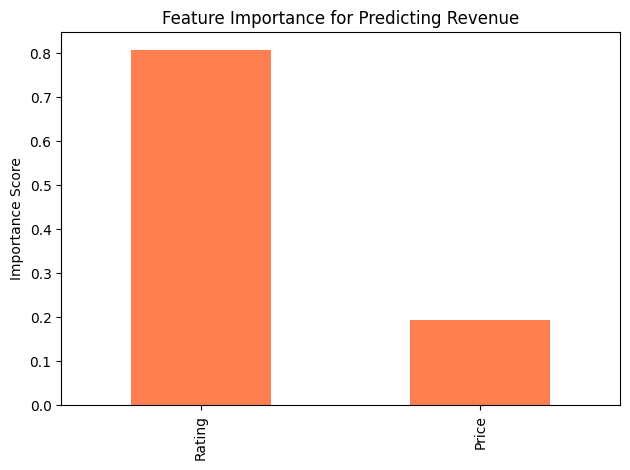

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
df['City'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Revenue'] = df['Price'] * df['Rating']

# Drop rows with missing values
df_clean = df.dropna(subset=['Price', 'Rating', 'Revenue'])

# Define features (X) and target (y)
X = df_clean[['Price', 'Rating']]  # Occupancy_Rate not available
y = df_clean['Revenue']

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance plot
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Feature Importance for Predicting Revenue')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()
